<a href="https://colab.research.google.com/github/SandunDayananda/support-vector-machines/blob/main/hyperparameters%20and%20parameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

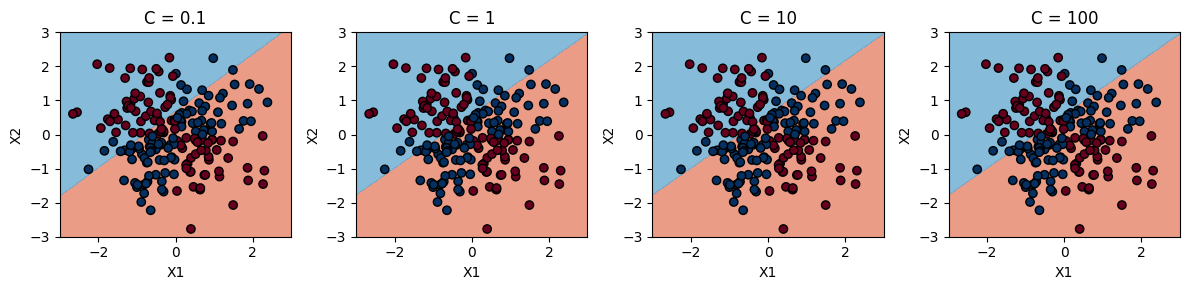

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Generate random data
np.random.seed(0)
X = np.random.randn(200, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# Fit SVM with different values of C
C_values = [0.1, 1, 10, 100]
plt.figure(figsize=(12, 3))
for i, C in enumerate(C_values):
    svm = SVC(kernel='linear', C=C)
    svm.fit(X, y)

    # Plot decision boundary
    plt.subplot(1, len(C_values), i + 1)
    xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                         np.linspace(-3, 3, 500))
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu_r, edgecolors='k')
    plt.title(f"C = {C}")
    plt.xlabel("X1")
    plt.ylabel("X2")

plt.tight_layout()
plt.show()


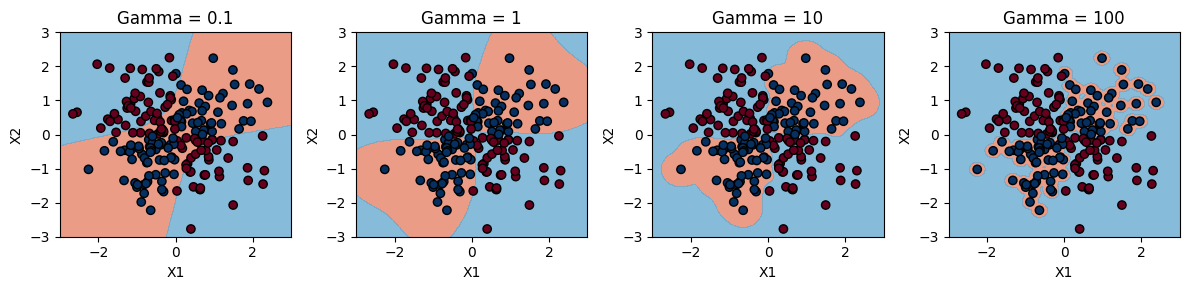

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Generate random data
np.random.seed(0)
X = np.random.randn(200, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# Fit SVM with different values of gamma
gamma_values = [0.1, 1, 10, 1000000]
plt.figure(figsize=(12, 3))
for i, gamma in enumerate(gamma_values):
    svm = SVC(kernel='rbf', gamma=gamma)
    svm.fit(X, y)

    # Plot decision boundary
    plt.subplot(1, len(gamma_values), i + 1)
    xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                         np.linspace(-3, 3, 500))
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu_r, edgecolors='k')
    plt.title(f"Gamma = {gamma}")
    plt.xlabel("X1")
    plt.ylabel("X2")

plt.tight_layout()
plt.show()


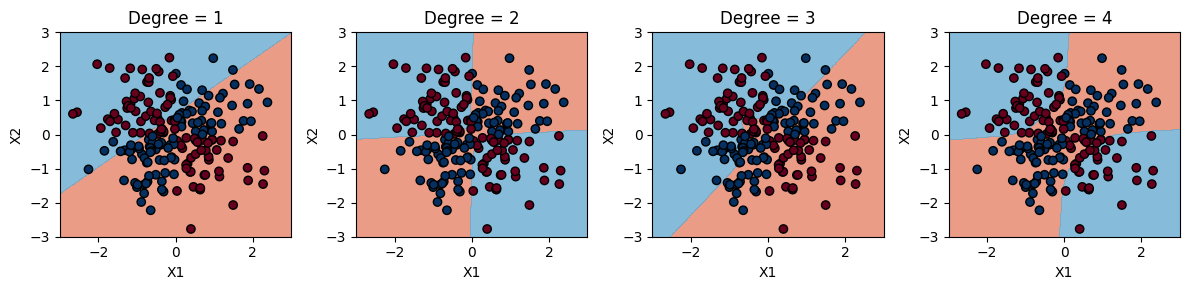

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Generate random data
np.random.seed(0)
X = np.random.randn(200, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# Fit SVM with different values of degree
degree_values = [1, 2, 3, 4]
plt.figure(figsize=(12, 3))
for i, degree in enumerate(degree_values):
    svm = SVC(kernel='poly', degree=degree)
    svm.fit(X, y)

    # Plot decision boundary
    plt.subplot(1, len(degree_values), i + 1)
    xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                         np.linspace(-3, 3, 500))
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu_r, edgecolors='k')
    plt.title(f"Degree = {degree}")
    plt.xlabel("X1")
    plt.ylabel("X2")

plt.tight_layout()
plt.show()


In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Generate random data
np.random.seed(0)
X = np.random.randn(200, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# Split data into train and test sets with a fixed random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit SVM on the training set
svm = SVC()
svm.fit(X_train, y_train)

# Evaluate on the test set
accuracy = svm.score(X_test, y_test)
print(f"Accuracy: {accuracy}")


Accuracy: 0.95


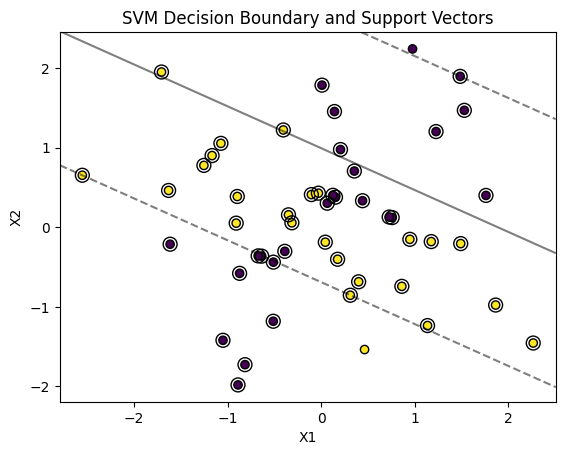

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Generate random data
np.random.seed(0)
X = np.random.randn(50, 2) #Here you can change the number of datapoints and observe how the margins change
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# Fit SVM
svm = SVC(kernel='linear')
svm.fit(X, y)

# Plot decision boundary and support vectors
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.viridis, edgecolors='k')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate the decision function
xx = np.linspace(xlim[0], xlim[1], 500)
yy = np.linspace(ylim[0], ylim[1], 500)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'], colors='k')
ax.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1],
           s=100, facecolors='none', edgecolors='k')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("SVM Decision Boundary and Support Vectors")
plt.show()
